In [70]:
import jieba
import jieba.analyse
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [71]:
filename = r"D:\cgu\課程\四年級\四上\自然語言處理\HW1\hw1-dataset.txt"
#filename = r"D:\cgu\課程\四年級\四上\自然語言處理\HW1\test.txt"

### 分詞

In [72]:
jieba.set_dictionary('dict.txt-v2.big')    

string2=['']
with open("hw1-dataset.txt", "r",encoding = 'utf-8') as f:
#with open("test.txt", "r",encoding = 'utf-8') as f:
    data = f.read().splitlines()
    string2=data
stri = "".join(string2)
string1 = jieba.lcut(stri,cut_all=False)

Building prefix dict from D:\cgu\課程\四年級\四上\自然語言處理\HW1\dict.txt-v2.big ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.u43bb23e86e4b3834da3c7bce3abff3c8.cache
Loading model cost 0.628 seconds.
Prefix dict has been built successfully.


### 移除停留詞

In [73]:
new_list = []
def remove_stop_words(file_name,string1):
    with open(file_name,'r',encoding="utf-8") as f:
        stop_words = f.readlines()
    stop_words = [stop_word.rstrip() for stop_word in stop_words]
  
    for seg in string1:
        if seg not in stop_words:
            if seg == '\n':
                continue
            elif seg == '\t':
                continue
            elif seg == ' ':
                continue
            elif len(seg) == 1:
                continue
            else:
                new_list.append(seg) #若在for loop裡用remove的話則會改變總長度
    return new_list

file_name = './停留詞.txt'
string1 = remove_stop_words(file_name,string1)
#print('remove_stop_words: ',string1)

### 詞頻統計

In [74]:
new={}
wordArr = []
countArr =[]
allWordNum=0
for word in string1:
    # 對原來的字典new中判斷是否有rword這個人，沒有就返回0，
    # 賦予rword鍵有就在原來rword所對應的值加1，並賦予rword鍵
    new[word]=new.get(word,0)+1
    allWordNum+=1

for word in new :
    new[word]=new[word]/allWordNum
    
#print(new)
item=list(new.items())
#print(new.items())
#print(allWordNum)
item.sort(key=lambda x:x[1],reverse=True)
for i in range(100):
    word,count=item[i]
    wordArr.append(word)
    countArr.append(count)

### 頻率長條圖 

1 : 八卦
2 : 有沒有
3 : 什麼
4 : 台灣
5 : 可以
6 : 是不是
7 : 為什麼
8 : 怎麼
9 : 肥宅
10 : 現在
11 : 真的
12 : 比較
13 : 不會
14 : 知道
15 : 自己
16 : 怎麼辦
17 : 沒有
18 : 不是
19 : 還是
20 : 一個
21 : 就是
22 : 如果
23 : 一堆
24 : 這樣
25 : 一樣
26 : 覺得
27 : 怎樣
28 : 到底
29 : 日本
30 : 喜歡
31 : 不要
32 : 時候
33 : 大家
34 : 美國
35 : 有人
36 : 很多
37 : 為何
38 : 台灣人
39 : 應該
40 : 問題
41 : 感覺
42 : 哪個
43 : 幹嘛
44 : 看到
45 : 朋友
46 : 這麼
47 : 因為
48 : 如何
49 : 還有
50 : 一直
51 : 這種
52 : 中國
53 : 東西
54 : 女生
55 : 其實
56 : 不能
57 : 別人
58 : 出來
59 : 然後
60 : 開始
61 : 不用
62 : 根本
63 : 一定
64 : 正妹
65 : 國家
66 : 多少
67 : 國人
68 : 那麼
69 : 的話
70 : 只有
71 : 鄉民
72 : 可能
73 : 以前
74 : 這個
75 : 哪裡
76 : 已經
77 : 甚麼
78 : QQ
79 : 妹妹
80 : 一下
81 : 今天
82 : 那個
83 : 大學
84 : 請問
85 : 時間
86 : 所以
87 : 直接
88 : 邊緣
89 : 老師
90 : 只是
91 : 變成
92 : 發現
93 : 最後
94 : 好吃
95 : 韓國
96 : 他們
97 : 世界
98 : 男生
99 : 不到
100 : 老婆


<BarContainer object of 100 artists>

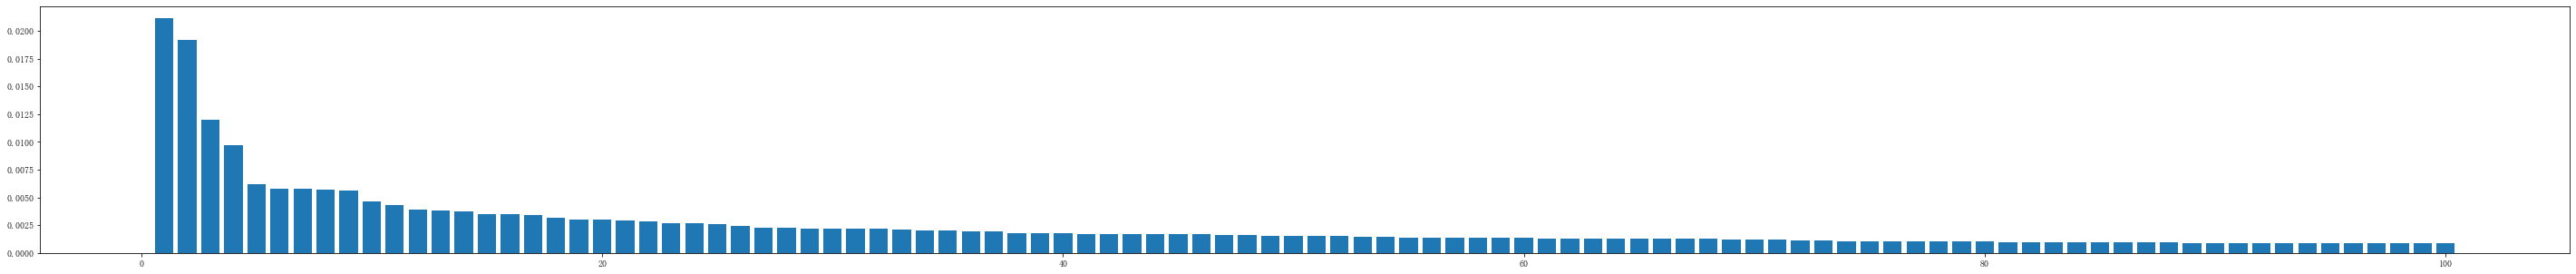

In [75]:
num = []
index=1

for i in range(100):
    num.append(index)
    print(index,":",wordArr[i])
    index+=1

matplotlib.rc("font",family='SimSun')
plt.figure(figsize=(50,5))
plt.bar(num, countArr)

### TF-IDF權重

In [76]:
tagWordArr = []
weightArr =[]
with open(filename,'r',encoding = 'utf-8') as f:
    for line in f.readlines():
        #topK 為返回 TF-IDF 權重最大的關鍵詞(一篇文章一個topK)
        #withWeight 代表是否返回關鍵字權重值，默認為 False
        #tags = jieba.analyse.extract_tags(line, topK=5, withWeight=True)
        tags = jieba.analyse.extract_tags(line, withWeight=True)
        for tag in tags:
            if len(tag) == 1:
                continue
            else :
                tagWordArr.append(tag[0])
                weightArr.append(tag[1])

In [77]:
def Merge_Sort(array,word):
    if len(array) > 1:
        mid = len(array) // 2
        left_array = array[:mid]
        right_array = array[mid:]
        left_array1 = word[:mid]
        right_array1 = word[mid:]        

        Merge_Sort(left_array,left_array1)
        Merge_Sort(right_array,right_array1)

        right_index = 0;
        left_index = 0;
        merged_index = 0;
        while right_index < len(right_array) and left_index < len(left_array):
            if(right_array[right_index] < left_array[left_index]):
                array[merged_index] = right_array[right_index]
                word[merged_index] = right_array1[right_index]
                right_index = right_index + 1
            else:
                array[merged_index] = left_array[left_index]
                word[merged_index] = left_array1[left_index]
                left_index = left_index + 1

            merged_index = merged_index + 1

        while right_index < len(right_array):
            array[merged_index] = right_array[right_index]
            word[merged_index] = right_array1[right_index]
            right_index = right_index + 1
            merged_index = merged_index + 1

        while left_index < len(left_array):
            array[merged_index] = left_array[left_index]
            word[merged_index] = left_array1[left_index]
            left_index = left_index + 1
            merged_index = merged_index + 1

Merge_Sort(weightArr,tagWordArr)

weightArr100=[]
tagWordArr100=[]
weightArr100=weightArr[-100:]
tagWordArr100=tagWordArr[-100:]

tagWordArr100.reverse()
weightArr100.reverse()

### TF-IDF長條圖 

1 : 蹦蹦跳
2 : 蹦蹦跳
3 : 卡米
4 : 三小
5 : 吉吉
6 : 功高震主
7 : 咪咪
8 : 告白
9 : TENGA
10 : 怎麼
11 : 嘻三小
12 : 無聊
13 : 修幹
14 : 最愛
15 : 工頭
16 : 不會
17 : 這樣
18 : OAO
19 : 敢動
20 : 小褲
21 : 魯蛇腫
22 : 當你
23 : 當你個
24 : 無理
25 : 西門
26 : 人聲
27 : 2222222222222
28 : 種子
29 : 因為
30 : 金爆
31 : 我問
32 : 哪個
33 : 滾喇幹
34 : 達人
35 : 幹菲力斯
36 : 有蘿莉控
37 : 這件
38 : 沒有
39 : 三葉
40 : 機勒
41 : 藍藍
42 : 之聲
43 : 媽媽
44 : 好小好
45 : 起風
46 : 10000p
47 : 蘇美
48 : 有沒有
49 : 幾點
50 : 文之亂
51 : 大金剛
52 : 傷心
53 : 借錢
54 : 一點
55 : skyjazz
56 : 警報
57 : 超肥
58 : 知味
59 : 初音
60 : sivhd
61 : 出國
62 : 吃海鮮
63 : 一樣
64 : 公三小
65 : 賺錢
66 : 鄉下
67 : 什麼
68 : 中槍
69 : OO
70 : 推娃
71 : 媽媽
72 : 道術
73 : enter
74 : 雙重標準
75 : 杉林溪
76 : 中國撈
77 : 77
78 : 偽物
79 : 一隻
80 : 楊桃
81 : louiswoman
82 : 越來越
83 : 炸彈
84 : 50
85 : 生日快樂
86 : 問號
87 : 什麼
88 : rz
89 : 迷唇
90 : 有沒有
91 : 什麼
92 : IKEAR
93 : 機車
94 : 劍來
95 : 結冰
96 : 八年級
97 : 進來
98 : 愛我
99 : 一切順利
100 : 一個


<BarContainer object of 100 artists>

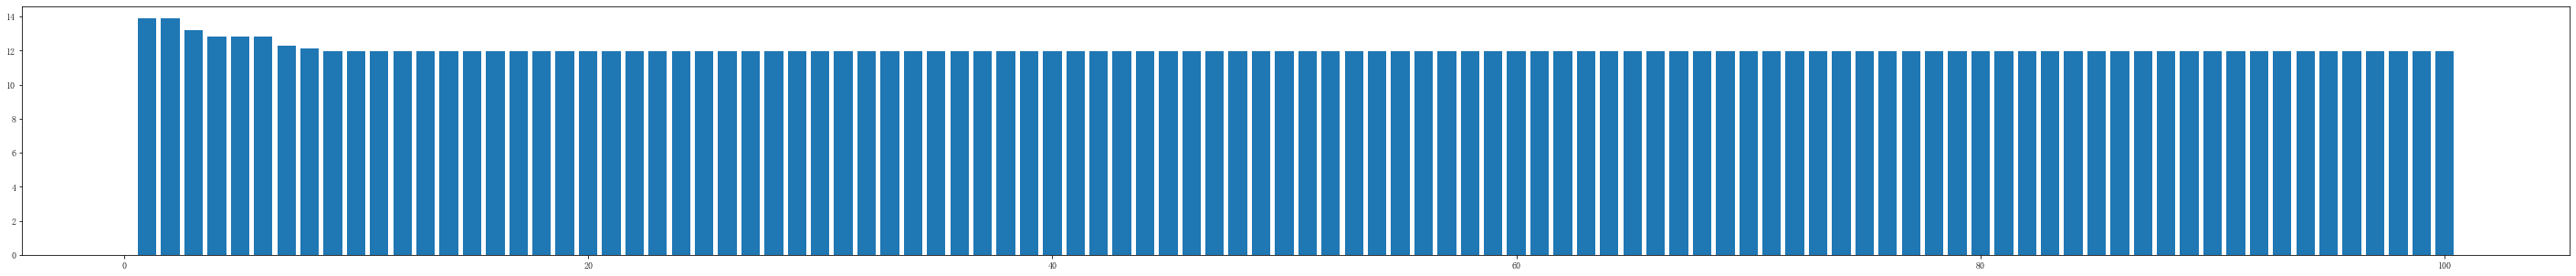

In [78]:
import matplotlib.pyplot as plt
import matplotlib

#weightArr100=weightArr[0:100]
#tagWordArr100=tagWordArr[0:100]
num = []
index=1
for i in range(100):
    num.append(index)
    print(index,":",tagWordArr100[i])
    index+=1

plt.figure(figsize=(50,5))
plt.bar(num, weightArr100)